# Appendix: Discussion Analysis

This notebook is a walkthrough for generating some of the numbers referenced in the Discussion section of the research paper, "**Modelling input-output relationships to optimize production of a live-attenuated malaria vaccine**". This notebook allows for an open review of the techniques that support the arguments in the paper. Furthermore, the techniques presented in this notebook can be extended for deeper insights on the data collected throughout the research project.

The notebook will assume some familiarity with the programming language, Python; however, the assumptions and steps which produced the results will be explicitly stated. The raw data can be accessed at the directory"**/data**" in parent folder.

## Getting Started

Read data into the Jupyter Notebook with the following cell. This cell takes the name of the file and returns the selected columns as a Pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def read_csv_data(filename):
    data = pd.read_csv(filename)
    return data

## Oocysts and Infectivity

Begin by importing the oocyst data from the CSV file, "**data/oocysts.csv**". The generated Pandas DataFrame is the source for the functions to follow.

In [10]:
FILENAME = "data/oocysts.csv"
oocysts_data = read_csv_data(filename=FILENAME)
# oocysts_data

,feed date,dissection date,infection age,strain [/code],feed,mated,oocyst total,midguts total,"oocysts, avg. per mq","oocysts, median","oocysts, std. dev.",infectivity (%),gametocytemia (%),exflagellation (%)
0,06/23/2021,07/01/2021,8,NF54 / T4,13,False,29,10,2.90,2,3.45,50.00,0.10,NaN
1,06/23/2021,07/01/2021,8,NF54 / T7,13,False,49,12,4.08,2,5.96,33.33,0.10,NaN
2,06/23/2021,07/01/2021,8,NF54 / T9,13,False,9,6,1.50,0,3.21,71.43,0.10,NaN
3,06/26/2021,07/09/2021,13,NF54 / FARAH,14,False,12,8,1.50,0,2.78,25.00,0.10,NaN
4,06/26/2021,07/09/2021,13,NF54 / T7,14,False,79,5,15.80,15,14.86,100.00,0.10,NaN
5,06/26/2021,07/09/2021,13,NF54 / T9,14,False,89,11,8.09,0,11.71,45.45,0.10,NaN
6,07/05/2021,07/16/2021,11,NF135,15,False,0,10,0.00,0,0.00,0.00,0.10,0.032164
7,07/05/2021,07/16/2021,11,MIX,15,False,1,10,0.10,0,0.32,10.00,0.10,NaN
8,07/05/2021,07/16/2021,11,NF54,15,False,2,8,0.25,0,0.46,25.00,0.10,0.129825
9,07/15/2021,07/23/2021,8,NF54 / FARAH,16,False,156,11,14.18,14,9.73,90.91,0.10,0.236948


### 1) How large is one standard deviation compared to the oocyst mean?

We are interested in how large 1s is compared to the oocyst mean per mosquito. This calculation gives information as to how wide the range of infection was for mosquitoes in that pot. A small ratio of standard deviation to mean would indicate that many infections (as measured by oocyst count) fall around the mean. Otherwise, if large then many fall away from the mean.

As discussed in the paper, many experiments yielded low infection, if any at all, with a few mosquitoes yielding incredibly high infection. In this case, the ratio of standard deviation to mean should be large ( > 1:1 or 100%). The column for oocyst standard deviation and the column for oocyst mean are taken from the dataframe. Then each std. dev. is divided by its mean and the results are averaged.

In [32]:
def calculate_std_to_mean_ratio():
    global oocysts_data
    oocyst_stds = oocysts_data['oocysts, std. dev.'].to_numpy()
    oocyst_means = oocysts_data['oocysts, avg. per mq'].to_numpy()
    is_mated = oocysts_data['mated'].to_numpy()
    
    egg_condition = is_mated == True
    virgin_condition = is_mated == False
    
    # egg group
    egg_oocyst_stds = oocyst_stds[egg_condition]
    egg_oocyst_means = oocyst_means[egg_condition]
    egg_std_to_mean_ratio = np.nan_to_num(egg_oocyst_stds / egg_oocyst_means)
    
    # virgin group
    virgin_oocyst_stds = oocyst_stds[virgin_condition]
    virgin_oocyst_means = oocyst_means[virgin_condition]
    virgin_std_to_mean_ratio = np.nan_to_num(virgin_oocyst_stds / virgin_oocyst_means)
    
    return egg_std_to_mean_ratio, virgin_std_to_mean_ratio

From here, produce the egg group ratio and the virgin group ratio for each experiment. These values are averaged and multipled by 100 to convert from fraction to percent.

In [33]:
# note, an error message will generate when the cell runs; this can be ignored
egg_ratio, virgin_ratio = calculate_std_to_mean_ratio()

# calculate the std to mean ratios for both groups and convert the ratios into precents
std_to_mean_egg_percent = egg_ratio.mean() * 100
std_to_mean_virgin_percent = virgin_ratio.mean() * 100

/Library/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Library/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


140.7311651982435

### 2) What is the distribution of mosquito infection for any feed, X?

The following cells take the the number of oocysts found on each dissected midgut in a given feed and returns a distribution. This is a useful visualize of infection within a group. See the paper for further insights. 

Note: the dissected midguts are only separated by feed and mating status--not by the culture that they were fed.

In [34]:
infection_in_egg_group = read_csv_data(filename="data/raw_oocysts_egg.csv")
infection_in_virgin_group = read_csv_data(filename="data/raw_oocysts_virgin.csv")

In [57]:
def create_histogram(data, xlabel, ylabel, title, save_as="default"):
    plt.hist(x=data, bins='auto', color='#69b6e7', alpha=0.7, rwidth=0.75)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.savefig(f"graphs/{save_as}")
    plt.show() # uncomment this line if you would like to see the distribution in jupyter

def generate_infection_distribution_by_egg_feed(feed):
    global infection_in_egg_group
    feed_infection = infection_in_egg_group[f"feed {feed}"].to_numpy()
    create_histogram(
        data=feed_infection,
        xlabel="Oocysts", 
        ylabel="Mosquitos", 
        title=f"Frequency of Oocyst Yield within Feed {feed} \n(Egg Group)",
        save_as=f"infection_distribution_egg_feed_{feed}"
    )
    
def generate_infection_distribution_by_virgin_feed(feed):
    global infection_in_virgin_group
    feed_infection = infection_in_virgin_group[f"feed {feed}"].to_numpy()
    create_histogram(
        data=feed_infection,
        xlabel="Oocysts", 
        ylabel="Mosquitos", 
        title=f"Frequency of Oocyst Yield within Feed {feed} \n(Virgin Group)",
        save_as=f"infection_distribution_virgin_feed_{feed}"
    )

Then, run the cell below to generate the given distribution. Specify the feed number.

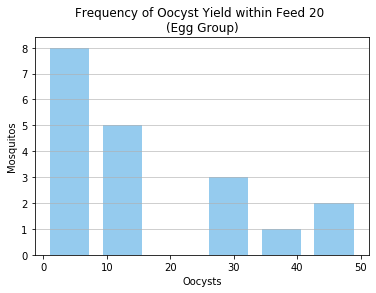

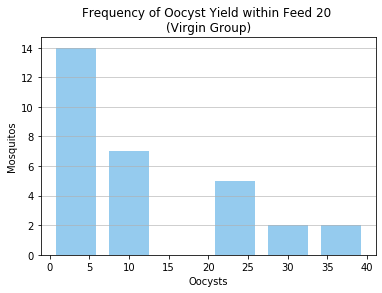

In [66]:
# Select any feed between 13 and 20.
FEED='20'

generate_infection_distribution_by_egg_feed(feed=FEED)
generate_infection_distribution_by_virgin_feed(feed=FEED)

### 3) How do the average oocyst outputs of the different feeds compare to each other?

To answer this question, the oocyst averages can simply be plotted together on a bar graph. The following cells will explore this question.

In [101]:
def create_bar_chart(x, y, xlabel, ylabel, title, save_as="default"):
    x_pos = [i for i, _ in enumerate(x)]
    
    plt.bar(x_pos, y, color="blue")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.xticks(x_pos, x, rotation=90)
    
    # plt.savefig(f"graphs/{save_as}")
    plt.show()

def generate_bar_graph_comparing_oocyst_mean_across_feeds():
    global oocysts_data
    oocyst_means = oocysts_data['oocysts, avg. per mq'].to_numpy()
    is_mated = oocysts_data['mated'].to_numpy()
    
    codes = oocysts_data['strain [/code]'].to_numpy()
    feeds = oocysts_data['feed'].to_numpy()
    
    egg_condition = is_mated == True
    virgin_condition = is_mated == False
    
    egg_oocyst_means = oocyst_means[egg_condition]
    virgin_oocyst_means = oocyst_means[virgin_condition]
    
    egg_labels =  feeds[egg_condition]
    virgin_labels = feeds[virgin_condition]
    
    create_bar_chart(
        x=egg_labels, 
        y=egg_oocyst_means, 
        xlabel="Feed",
        ylabel="Average Oocyst Ouput",
        title="Average Oocyst Ouput by Feed \n(Egg Group)"
    )
    create_bar_chart(
        x=virgin_labels, 
        y=virgin_oocyst_means, 
        xlabel="Feed",
        ylabel="Average Oocyst Ouput",
        title="Average Oocyst Ouput by Feed \n(Virgin Group)"
    )

The multiple bars for any given feed reflect the different strains within that feed. Note that the heights of the bar graphs differ.

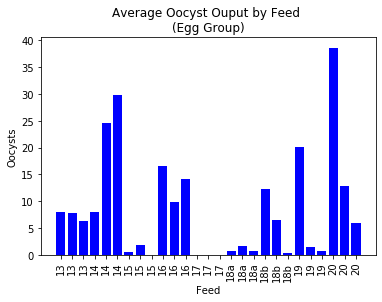

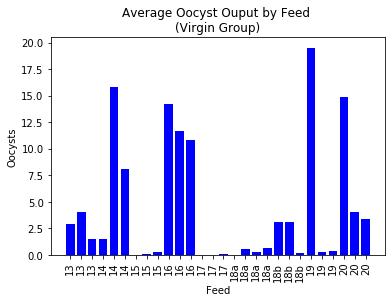

In [102]:
generate_bar_graph_comparing_oocyst_mean_across_feeds()

### 4) How many feeds contain moquitoes that yielded more than X oocysts?

To answer this question, we will plot a bar graph of all the feeds on the x-axis and the number of mosquitoes with more than the given number of oocysts. The following cells will explore this question.

In [109]:
def count_number_of_mqs_over_threshold(feed_infection, threshold):
    count = 0
    for oocyst_count in feed_infection:
        if oocyst_count > threshold: count += 1
    return count

def generate_bar_graph_comparing_feeds_by_threshold_infection_egg_group(threshold):
    global infection_in_egg_group
    labels = ["13", "14", "15", "16", "17", "18a", "18b", "19", "20"]
    feeds_by_threshold = []
    for feed in labels:
        feed_infection = infection_in_egg_group[f"feed {feed}"].to_numpy()
        num_over_threshold = count_number_of_mqs_over_threshold(feed_infection, threshold)
        feeds_by_threshold.append(num_over_threshold)
    
    create_bar_chart(
        x=labels, 
        y=feeds_by_threshold, 
        xlabel="Feed",
        ylabel=f"# of Infections over {threshold} Oocysts",
        title=f"Comparing Feeds by Threshold Infection: {threshold} \n(Egg Group)"
    )

def generate_bar_graph_comparing_feeds_by_threshold_infection_virgin_group(threshold):
    global infection_in_virgin_group
    labels = ["13", "14", "15", "16", "17", "18a", "18b", "19", "20"]
    feeds_by_threshold = []
    for feed in labels:
        feed_infection = infection_in_virgin_group[f"feed {feed}"].to_numpy()
        num_over_threshold = count_number_of_mqs_over_threshold(feed_infection, threshold)
        feeds_by_threshold.append(num_over_threshold)
    
    create_bar_chart(
        x=labels, 
        y=feeds_by_threshold, 
        xlabel="Feed",
        ylabel=f"# of Infections over {threshold} Oocysts",
        title=f"Comparing Feeds by Threshold Infection: {threshold} \n(Virgin Group)"
    )

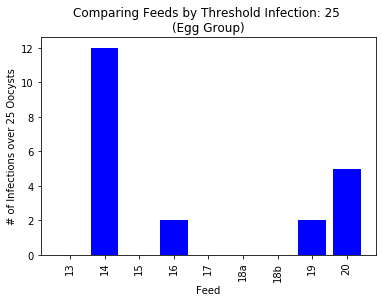

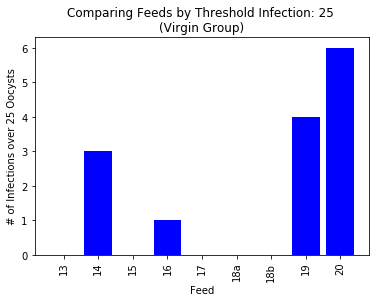

In [110]:
THRESHOLD=25

generate_bar_graph_comparing_feeds_by_threshold_infection_egg_group(threshold=THRESHOLD)
generate_bar_graph_comparing_feeds_by_threshold_infection_virgin_group(threshold=THRESHOLD)